<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/main/6_MedImp_Med_part_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2025 MedIMP Course Parts: <span style= "color:orange"> MEDICAL DATA MANIPULATION AND PROCESSING </span>


### **Objective:**

This tutorial section aims to provide participants with a foundational understanding of **medical image processing**, covering essential concepts such as **medical imaging formats**, **data handling**, and **pre-processing techniques**. Participants will learn to work with key medical image processing libraries, including **SimpleITK**, **pydicom**, **TorchIO**, and **MONAI**, and explore deep learning-based approaches for medical image analysis. The section will also cover data **augmentation techniques**, and visualization methods as well as setting up **custom data loaders** in PyTorch to equip learners with practical skills for medical imaging applications.


<img src='https://torchio.readthedocs.io/_images/fpg_progressive.gif'>

Image source: [https://torchio.readthedocs.io/transforms/transforms.html](https://torchio.readthedocs.io/transforms/transforms.html)

## Course Outline:

#### Introduction to Image processing

#### Loading and Saving Medical Data
- Medical Imaging Formats
    - <span style="color: orange">DICOM</span>
    - <span style="color: orange">NifTI</span>
    - Analyze (HDR/IMG)
    - MINC (Medical Imaging NetCDF)
    - MHD/RAW (MetaImage)
    - PNG/JPEG/TIFF for Medical Imaging
- Medical Image Processing Libraries
    - General Medical Image Processing Libraries
        - SimpleITK
        - pydicom
        - NiBabel
    - Computer Vision Libraries
        - OpenCV
        - scikit-image
        - <span style="color:red">TorchVision: Optimized for 2D</span>
    - Deep Learning-Based Medical Image Analysis Libraries
        - <span style="color: orange">MONAI</span> (Medical Open Network for AI)
        - <span style="color: orange">TorchIO</span>
- Visualization of Medical Images
    - matplotlib & seaborn
    - ITK-SNAP
#### Medical Image Pre-processing
- Normalization
- Rescaling
- Reshaping
- Registration
- Skull Striping

#### Data Augmentation
- Geometric
    - Rotation
    - Flipping
    - Scaling
    - Translation
- Intensity
    - Noise
    - Contrast
    - Brightness
    - Histogram Equalization
#### Data Loaders (with PyTorch)

# Introductory Materials and Environment Setup

## Importing The BraTS2021 data on Kaggle

In [4]:
import kagglehub
dschettler8845_brats_2021_task1_path = kagglehub.dataset_download('dschettler8845/brats-2021-task1')

print('Data source import complete.')

Data source import complete.


In [5]:
# Extrating the data
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00495.tar

./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


In [6]:
import os

file_size = os.path.getsize('/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar')
print('Размер файла:', file_size, 'byte')

Размер файла: 13396408320 byte


## Xray data - siim-acr-pneumothorax-segmentation

In [7]:
!pip install kaggle

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [10]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c siim-acr-pneumothorax-segmentation

 80% 330M/412M [00:02<00:00, 88.8MB/s]
100% 412M/412M [00:02<00:00, 148MB/s] 


In [12]:
!unzip siim-acr-pneumothorax-segmentation.zip

Archive:  siim-acr-pneumothorax-segmentation.zip
  inflating: download_images.py      
  inflating: mask_functions.py       
  inflating: stage_2_images/ID_0011fe81e.dcm  
  inflating: stage_2_images/ID_003206608.dcm  
  inflating: stage_2_images/ID_004d6fbb6.dcm  
  inflating: stage_2_images/ID_004d72c54.dcm  
  inflating: stage_2_images/ID_00528aa0e.dcm  
  inflating: stage_2_images/ID_00593ac6d.dcm  
  inflating: stage_2_images/ID_00b0e5a9f.dcm  
  inflating: stage_2_images/ID_00b115bfe.dcm  
  inflating: stage_2_images/ID_00d054471.dcm  
  inflating: stage_2_images/ID_00f04769e.dcm  
  inflating: stage_2_images/ID_00f715288.dcm  
  inflating: stage_2_images/ID_010566ba9.dcm  
  inflating: stage_2_images/ID_0159b1d59.dcm  
  inflating: stage_2_images/ID_017bd788a.dcm  
  inflating: stage_2_images/ID_018f96b48.dcm  
  inflating: stage_2_images/ID_0194bdd5a.dcm  
  inflating: stage_2_images/ID_01a3312da.dcm  
  inflating: stage_2_images/ID_01bbf9032.dcm  
  inflating: stage_2_images/I

## Medical Imaging File Formats


The first X-ray appeared in 1895 and since then it has become an integral part of clinical care. By 2021, the volume has reached more than three and a half billion terabytes of medical images in the United States alone. All this opens up enormous opportunities for image analysis.

For example: predicting pathology using neural networks, measuring the shape and size of organs, creating 3D reconstructions.

**DICOM** (Digital Imaging and Communications in Medicine) — medical industry standard for the creation, storage, transmission and visualization of digital medical images and documents of examined patients. The DICOM standard was developed by the National Electronic Equipment Manufacturers Association (National Electrical Manufacturers Association).

The [DICOM](https://en.wikipedia.org/wiki/DICOM) standard defines two information levels:

1. File level - DICOM File (DICOM file) - an object file with a tag organization for representing an image frame (or series of frames) and accompanying or control information (in the form of DICOM tags);
2. Network (communication) - DICOM Network Protocols (DICOM network protocol) - for transferring DICOM files and DICOM control commands over networks supporting TCP/IP.

The file level of the DICOM 3.0 standard, 2008 edition, describes:
* patient attributes and demographics;
* model and manufacturer of the device on which the examination was carried out;
* attributes of the medical institution where the examination was carried out;
* attributes of the personnel who examined the patient;
* type of examination and time of its conduct;
* conditions and parameters of the patient's study;
* parameters of an image or a series of images recorded in a DICOM file;
* unique identification keys Unique Identifier (UID) of data groups described in the DICOM file.
* image, series or set of series obtained during examination of the patient.
* presentation, first of all, of PDF documents in a DICOM file.
* representation of DICOM recordings on optical media, including DVD format.
* DICOM protocol for transmission and reception via TCP/IP.
NIfTI-1 Data Format - adapted from the widely used ANALYZE file format. For more details, you can familiarize yourself with the file format at [links](https://nifti.nimh.nih.gov/nifti-1/documentation/hbm_nifti_2004.pdf).

**<span style="color: orange">DICOM</span> (.dcm)**:
Digital Imaging and Communications in Medicine, is the standard format for storing, sharing, and transmitting medical images across different devices and institutions. It includes metadata such as patient details and acquisition settings.
 - Retrieved directly from the scanner
 - Standardized across modalities (CT, MRI, US) and vendors (Siemens, Philips, GE, etc.)
 #### Pros:
  - Lots of information (acquisition parameters, image archives, etc.)
  - Supports multi-frame images (useful for CT and MRI scans).

 #### Cons:
  - Lots of information (**heavy**)
  - Some fields are vendor-specific
  - Not compressed... or rather, only the pixel data can be compressed (see [here](https://pydicom.github.io/pydicom/stable/old/image_data_handlers.html) for uncompressing DICOM pixel data)
  - **Single file per slice** (can end up with 1000s of files for a participant)

Read more about DICOM [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC61235/).

**<span style="color: orange">NifTI</span> (.nii)**: <u>N</u>euroimaging <u>I</u>n<u>f</u>ormatics <u>T</u>echnology <u>I</u>nitiative. NIfTI is optimized for neuroimaging applications, commonly used in MRI and fMRI scans. It supports multi-dimensional image storage.
 - NIH-based standard
 - Adopted by the MRI neuroimaging community
 #### Pros:
   - Compressed (.nii.gz)
   - **Single file per volume**
   - Compatible with deep learning frameworks.
   - Faster loading and processing than DICOM.

 #### Cons:
   - Some information is lost
   - Not a universal standard outside neuroimaging.
   - Limited metadata support compared to DICOM.

Read more about NIfTI [here](https://nifti.nimh.nih.gov/background).


**Analyze (HDR/IMG)**: An older neuroimaging format developed before NIfTI, consisting of separate header (HDR) and image (IMG) files.

#### Pros
- Simple format, easy to manipulate.
- Still used in some legacy neuroimaging tools.
#### Cons
- Lacks standardized metadata structure.
- Header and image stored separately, making management cumbersome.

**MINC (Medical Imaging NetCDF)**: A flexible, hierarchical format developed for medical imaging research, mainly used in neuroimaging.
#### Pros
- Supports multiple dimensions and data types.
#### Cons
- Limited adoption outside research settings.

**MHD/RAW (MetaImage)**: A simple, flexible format used in medical imaging research, often for volumetric data. The MHD file stores metadata, while the RAW file stores the image data.
#### Pros
- Flexible and easy to modify.
- Supports 3D and 4D medical images.
#### Cons
- Metadata and image data are stored separately, requiring careful management.
- No built-in compression, leading to large file sizes.


**PNG/JPEG/TIFF for Medical Imaging**: These are general-purpose image formats sometimes used for medical images in situations where metadata is less critical.
#### Pros
- Highly compressed, making them space-efficient.
-  Easy to view and share.
-  Widely supported by general imaging tools.
#### Cons
- No built-in medical metadata support.
- Not suitable for multi-dimensional medical images (e.g., 3D MRIs).


# Side note on voxels
<img src='https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.bilderzucht.de%2Fblog%2Fwp-content%2Fuploads%2F2010%2F05%2FA-Voxel-Resolution.jpg&f=1&nofb=1'>

A [voxel](https://en.wikipedia.org/wiki/Voxel) is a 3D analog of a pixel and is an important component of image quality. Increased voxel size results in an increased [signal-to-noise ratio](https://radiopaedia.org/articles/signal-to-noise-ratio-mri?lang=us). The trade-off for increased voxel size (ie. measure of 'true signal') is decreased spatial resolution.

Image source: [https://mrimaster.com/technique%20SNR.html](https://mrimaster.com/technique%20SNR.html)

In [13]:
import torch
example_volumn  = torch.rand(240,240,125)
example_volumn.shape

torch.Size([240, 240, 125])

# Brain Tumor Segmentation Dataset

__Background__: [BraTS Challenge](https://www.med.upenn.edu/cbica/brats/) first started in 2012 as part of the Internation Conference on Medical Image Computing and Computer Assisted Invervention (MICCAI).  Every year since, the challenge releases a large dataset of brain tumor MR scans, along with the manual delineation of tumor and edema regions.

__Inspiration__: Manual segmentation of tumors and lesions in MRIs is tedious and prone to inter-rater variability. Therefore, being able to automatically segment these regions will have a significant impact on medical diagnosis, prognosis, and treatment of patients.

__Dataset Description__:
 - All BraTS multimodal scans are available as NIfTI files (.nii.gz) and describe:
  
  a) native (T1)

  b) post-contrast T1-weighted (T1Gd)

  c) T2-weighted (T2), and

  d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes

<img src='https://case.edu/med/neurology/NR/t1t2flairbrain.jpg'>

Image source: [https://case.edu/med/neurology/NR/MRI%20Basics.htm](https://case.edu/med/neurology/NR/MRI%20Basics.htm). Read more about different MRI sequences [here](https://radiopaedia.org/articles/mri-sequences-overview) (long) or [here](https://www.wikidoc.org/index.php/MRI_sequences) (short).

 - Acquired with different clinical protocols and various scanners from multiple (n=19) institutions
 - The provided data are distributed after their pre-processing, i.e., co-registered to the same anatomical template, interpolated to the same resolution (1 mm^3) and skull-stripped. _(For the [following section](#scrollTo=xTH2OOupkwUF&line=1&uniqifier=1), we do not need to worry about the image being pre-processed already)_
    - Not covered here, but here is a [tutorial](https://github.com/r-barnes/skull-brain-seg/blob/v1.0.1/skull_segmentation.ipynb) to remove the skull from MRI images.


# Medical Image Processing Libraries

Most of the code snippet for this section are addapted from [this](https://thebtiboutheyna.medium.com/a-beginners-guide-to-commonly-used-libraries-for-medical-imaging-17b4cfbbf28) Medium Article

Dicom images are feely available from the Cancer Image Archive at : (https://nbia.cancerimagingarchive.net/nbia-search/?MinNumberOfStudiesCriteria=1&CollectionCriteria=Pediatric-CT-SEG). <img src="https://www.cancerimagingarchive.net/wp-content/uploads/2019/12/TCIA-logo-2x.png" height="100" width="100"/>
This is were I got that used in this tutorial

### SimpleITK

SimpleITK is a simplified version of ITK (Insight Toolkit), designed for easy manipulation of medical images, including filtering, segmentation, and registration.
- Supports DICOM, NIfTI, MINC, and other medical imaging formats.
- Read more about it [HERE](https://simpleitk.readthedocs.io/en/master/)

In [1]:
pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.4 MB/s eta 0:00:00


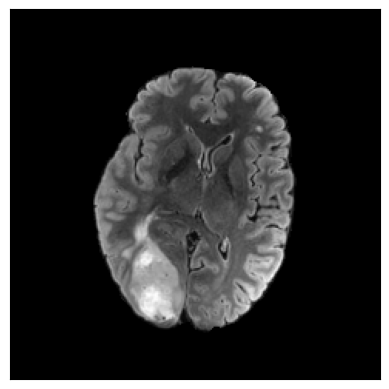

In [14]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load an image in SimpleITK format
sitk_image = sitk.ReadImage('/content/BraTS2021_00495_flair.nii.gz')

# (1)Convert the SimpleITK image to a numpy array
np_array = sitk.GetArrayFromImage(sitk_image)

# (2)Convert the numpy array to a SimpleITK image
sitk_image = sitk.GetImageFromArray(np_array)

# Print Sitk object
# Get some attributes of the object
# Print the shape of the Numpy array

slice_index = np_array.shape[0] // 2  # Select the middle slice
image_slice = np_array[slice_index, :, :]  # Extract the 2D slice
plt.imshow(image_slice, cmap='gray') # Use 'gray' colormap for medical images
plt.xticks([])
plt.yticks([])
plt.show()

### NiBabel
<img src= "https://nipy.org/nibabel/_static/nibabel-logo.svg">

NiBabel is a **Python library** used to handle **neuroimaging file formats** like NIfTI, MINC, and Analyze. It provides tools for reading and writing image headers and volumes.
- Efficiently loads and manipulates neuroimaging data.
- Supports multi-dimensional images (3D, 4D).
- Converting between different neuroimaging file formats.
  
Read more about Nibabel [HERE](https://nipy.org/nibabel/),
Also read about dicom2nifti [HERE](https://dicom2nifti.readthedocs.io/en/latest/)

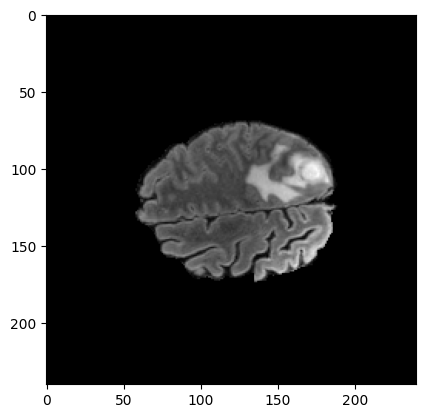

In [15]:
import nibabel as nib

# Load the medical image file
img = nib.load('/content/BraTS2021_00495_flair.nii.gz')

# Print the nib object
# print the header
# access header attributes


# Extract the image data as a numpy array
data = img.get_fdata()

# Create a new NIfTI image object with the filtered data and the same affine transformation matri
# nib.Nifti1Image(data, affine, header=None, extra=None, file_map=None)

nif_img = nib.Nifti1Image(data, img.affine)

# Save the image to a new file
nib.save(nif_img, 'newNifti_image.nii.gz')


slice_index = data.shape[0] // 2  # Select the middle slice
image_slice = data[:,:,slice_index]  # Extract the 2D slice
plt.imshow(image_slice, cmap='gray') # Use 'gray' colormap for medical images

### pydicom

pydicom is a pure Python library used to read, write, and manipulate DICOM files. It allows users to extract metadata and convert DICOM images into NumPy arrays.
- For extracting pixel data and metadata from DICOM images.
  
Read more about Pydicom [HERE](https://pydicom.github.io/pydicom/stable/)

To work with DICOM files we will use the `pydicom` library.

In [16]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.3 MB/s eta 0:00:00


In [17]:
import pydicom # library for working with DICOM files

from matplotlib import cm # color schemes for visualization
from matplotlib import pyplot as plt # visualization library

The first step is read the file using the `dcmread` method. Take the file as an example *`ID_01fe90211.dcm`*

In [18]:
example = 'stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)

**Notes** that as a result, the `imagedata` variable will be of type `pydicom.dataset.FileDataset`, since it contains not only the snapshot, but also metadata. To access the image, we need to use `pixel_array`, we will visualize the image using `matplotlib` and we will use `plt.cm.bone` as a color scheme so that our image looks like an x-ray.

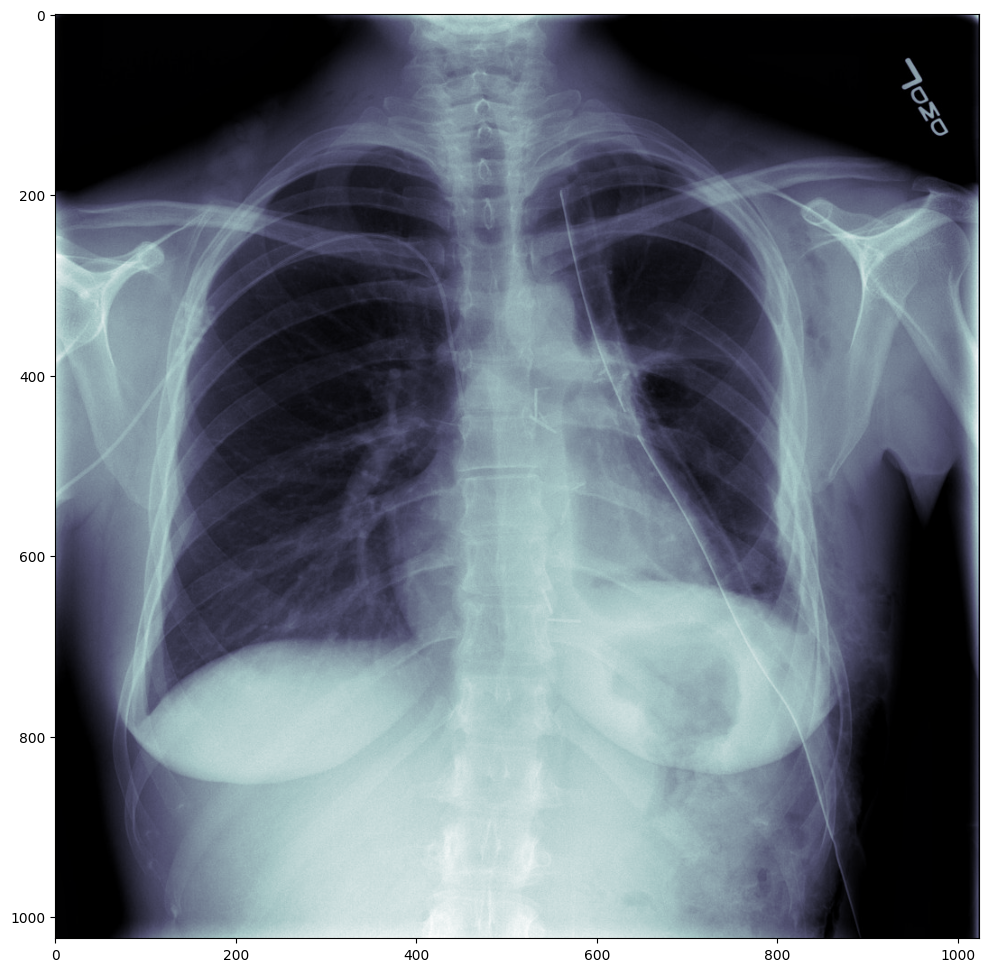

In [19]:
plt.figure(figsize=(12, 12))
plt.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
plt.show()

### MONAI
<img src="https://monai.io/assets/img/MONAI-logo_color_full.png" height="200" width="200">

MONAI is a specialized **deep learning framework** for medical imaging, built on top of PyTorch. It provides pre-built models and tools tailored for medical AI applications.
- Supports advanced augmentation and pre-processing for medical images.
- Provides state-of-the-art deep learning architectures for segmentation and classification.
- Optimized for multi-dimensional medical data (2D, 3D, 4D).

Learn more [HERE](https://monai.io/)

In [20]:
!pip -q install monai-weekly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00


In [21]:
from monai.data import ImageReader
from monai.transforms import LoadImage

In [22]:
# Load the image
image_path = "/content/BraTS2021_00495_flair.nii.gz"
loader = LoadImage(image_only=True)

image = loader(image_path)

print(f"Image shape: {image.shape}")  # Typically (H, W, D) for 3D images

Image shape: torch.Size([240, 240, 155])


### TorchIO
<img src="https://torchio.readthedocs.io/_static/torchio_logo_2048x2048.png" width="100" height="100">

TorchIO is a **PyTorch-based** library designed for medical imaging, with a focus on **deep learning**. It supports 3D images, making it suitable for MRI, CT, and PET scans.
- Provides extensive augmentations for medical images.
- Supports loading and preprocessing 3D image datasets.
- Works seamlessly with MONAI and PyTorch.

Read more about TorchIO [HERE](https://torchio.readthedocs.io/#)

In [24]:
!pip -q install torchio

In [25]:
import torchio as tio

# Load the image
image = tio.ScalarImage("/content/BraTS2021_00495_flair.nii.gz")
print(f"Image shape: {image.shape}")  # Shape is (C, H, W, D)

Image shape: (1, 240, 240, 155)


# Visualization of Medical Images

### matplotlib & seaborn
Matplotlib and Seaborn are general-purpose visualization libraries that can be used to display medical images in 2D.
- Used Plotting slices of MRI or CT scans.
- Visualizing segmentation maps of medical images.

# Medical Image Pre-processing With MONAI and TorchIO

Why is data preprocessing I/O so important ??
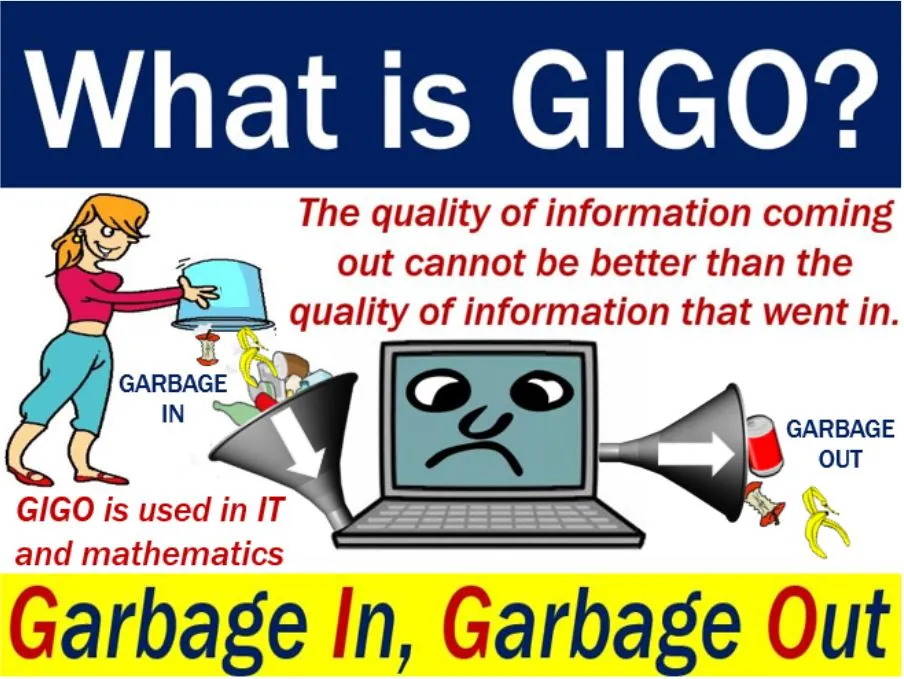

## The three parts of NIfTI images

NIfTI images can be roughly divided into three "parts":

1. The header with metadata
2. The image data
3. The affine matrix

### The header
The header of nifti files contains metadata about the scan, such as the units of measurement, the voxel size, etc. In `Nifti1Images`, the header is an attribute:

In [26]:
# store header attribute in a new variable, for ease of use
img_t1 = nib.load('/content/BraTS2021_00495_t1.nii.gz')
img_t2 = nib.load('/content/BraTS2021_00495_t2.nii.gz')
hdr = img_t1.header
print(type(hdr))

<class 'nibabel.nifti1.Nifti1Header'>


In [27]:
# Metadata Stored in the Header file
print(img_t1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0

The header is a custom `Nifti1Header` object with its own methods and attributes. For example, we can call the method `get_zooms()` to see the voxel size (and optionally the sampling rate with `get_xyzt_units()`, if it's a fMRI file).

## Meta information Dicom

DICOM files contain metadata in addition to the image. For example: age, gender, research modality, full name, body part and body position.

Let's try to explore our metadata.

In [28]:
example = 'stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)

print("ID:", imagedata.PatientID)
print("Age:", imagedata.PatientAge)
print("Sex:", imagedata.PatientSex)
print("Modality:", imagedata.Modality)
print("Bodypart:", imagedata.BodyPartExamined)
print("X-ray view of the image relative to object orientation:", imagedata.ViewPosition)

ID: 
Age: 26
Sex: F
Modality: CR
Bodypart: CHEST
X-ray view of the image relative to object orientation: PA


Let's look at modality. The main types (modalities) of medical images supported by the DICOM standard are presented below:

     CR - Computed Radiography;
     CT - Computed Tomography;
     DX - Digital Radiography;
     MG - Mammography.

And many other types of research.

Body part: CHEST - chest. A complete list of all body part abbreviations can be found [here](https://dicom.nema.org/medical/dicom/current/output/chtml/part16/chapter_L.html#chapter_L). As for the type of image relative to the orientation of the image object, for the chest it can take values corresponding to the direct (front and rear) and lateral (left or right) projections. PA - anterior, AP - posterior.

Separately, we can check whether the DICOM file contains an image and its size.

In [29]:
if 'PixelData' in imagedata:
    rows = int(imagedata.Rows)
    cols = int(imagedata.Columns)
    print("Размер изображения : {rows:d} x {cols:d}, {size:d} байт".format(
        rows=rows, cols=cols, size=len(imagedata.PixelData)))

Размер изображения : 1024 x 1024, 158236 байт


Let's take a quick analysis at the data.

For example, let's look at the distribution of age and gender in our dataset.

Let's start with the age distribution. Let's build a histogram.

In [32]:
!pip install seaborn==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [42]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


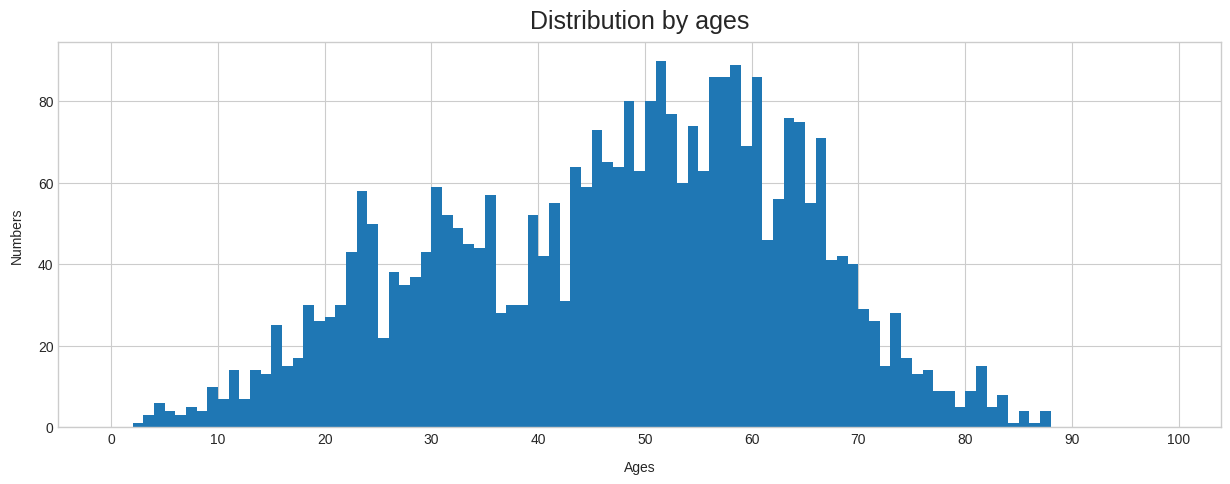

In [43]:

import warnings

# Ignore UserWarnings specifically from pydicom
warnings.filterwarnings("ignore", category=UserWarning, module='pydicom')

# Your code to load and process DICOM files
# ...
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np


datalist = sorted(glob("stage_2_images/*.dcm"))

patients = []

for t in datalist:
    data = pydicom.dcmread(t)
    patient = {}
    patient["UID"] = data.SOPInstanceUID
    patient["Age"] = data.PatientAge
    patient["Sex"] = data.PatientSex
    patient["Modality"] = data.Modality
    patient["BodyPart"] = data.BodyPartExamined
    patient["ViewPosition"] = data.ViewPosition
    patients.append(patient)

df_patients = pd.DataFrame(patients, columns=["UID", "Age", "Sex", "Modality", "BodyPart", "ViewPosition"])
df_patients["Age"] = pd.to_numeric(df_patients["Age"])

sorted_ages = np.sort(df_patients["Age"].values)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 5))
plt.hist(sorted_ages[:-2], bins=[i for i in range(100)])
plt.title("Distribution by ages", fontsize=18, pad=10)
plt.xlabel("Ages", labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel("Numbers", labelpad=10)
plt.show()

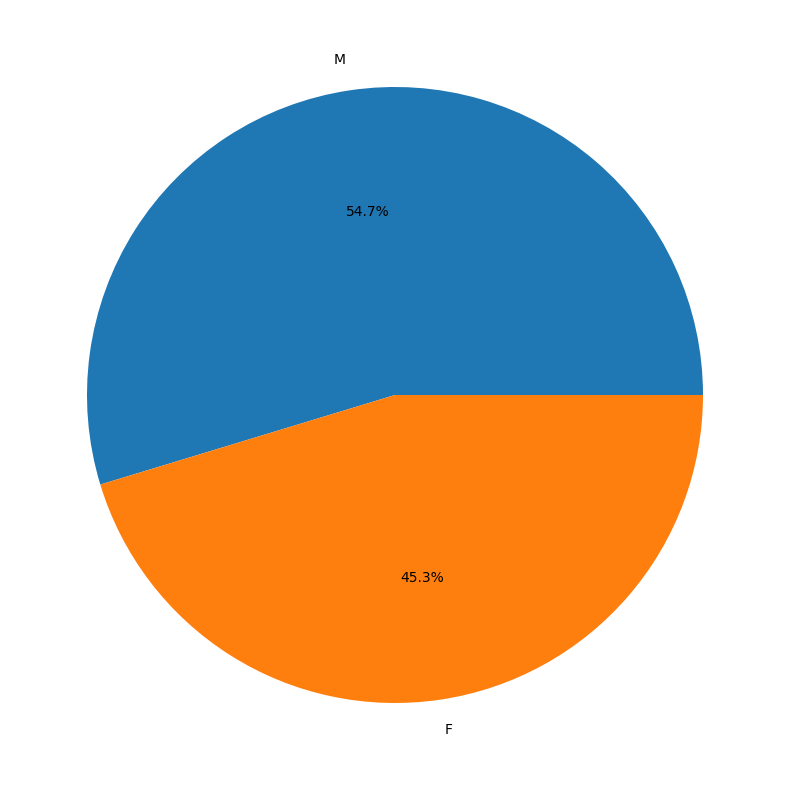

In [35]:
# let's look at the percentage of men and women.
plt.figure(figsize=(10, 10))
plt.pie([df_patients[df_patients["Sex"] == "M"].shape[0], df_patients[df_patients["Sex"] == "F"].shape[0]], labels=["M", "F"], autopct='%1.1f%%')
plt.show()

Read in detail about all meta tags [here](https://dicom.innolitics.com/ciods/digital-x-ray-image).

**Tasks 2**

Visualize and calculate percentage of image view relative to image subject orientation (PA, AP)



Counts of each ViewPosition:
ViewPosition
PA    1961
AP    1244
Name: count, dtype: int64

Percentages of each ViewPosition:
ViewPosition
PA    61.185647
AP    38.814353
Name: count, dtype: float64


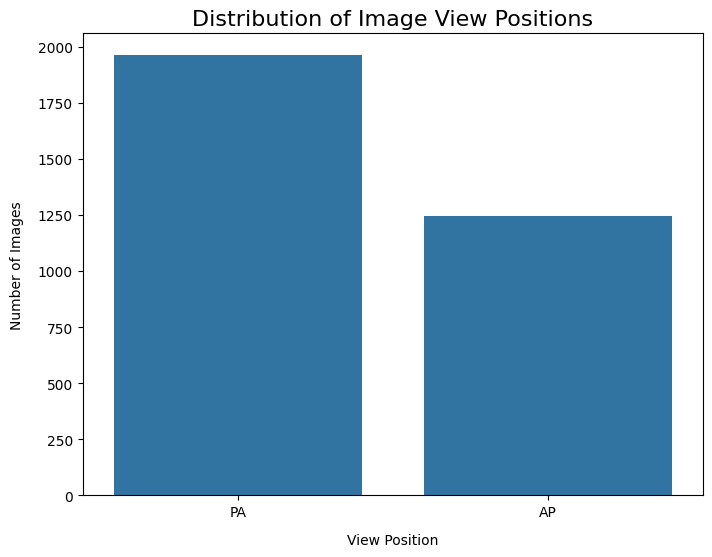

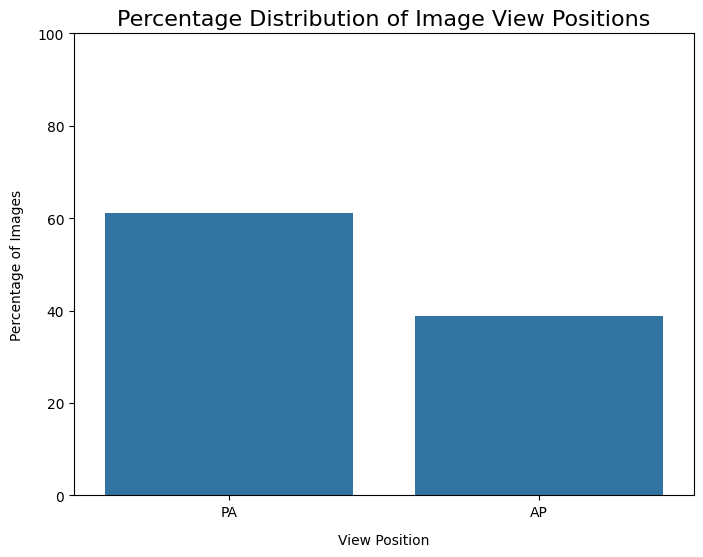

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_patients DataFrame is already created from your previous code

# Count the occurrences of each ViewPosition
view_counts = df_patients['ViewPosition'].value_counts()

# Calculate percentages
total_images = len(df_patients)
view_percentages = (view_counts / total_images) * 100

print("Counts of each ViewPosition:")
print(view_counts)
print("\nPercentages of each ViewPosition:")
print(view_percentages)

# Visualize the counts with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=view_counts.index, y=view_counts.values)
plt.title('Distribution of Image View Positions', fontsize=16)
plt.xlabel('View Position', labelpad=10)
plt.ylabel('Number of Images', labelpad=10)
plt.show()

# Visualize the percentages with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=view_percentages.index, y=view_percentages.values)
plt.title('Percentage Distribution of Image View Positions', fontsize=16)
plt.xlabel('View Position', labelpad=10)
plt.ylabel('Percentage of Images', labelpad=10)
plt.ylim(0, 100) # Ensure y-axis goes up to 100%
plt.show()

**Tasks 3**

Visualize and answer the question:

Which age range are there the most men?

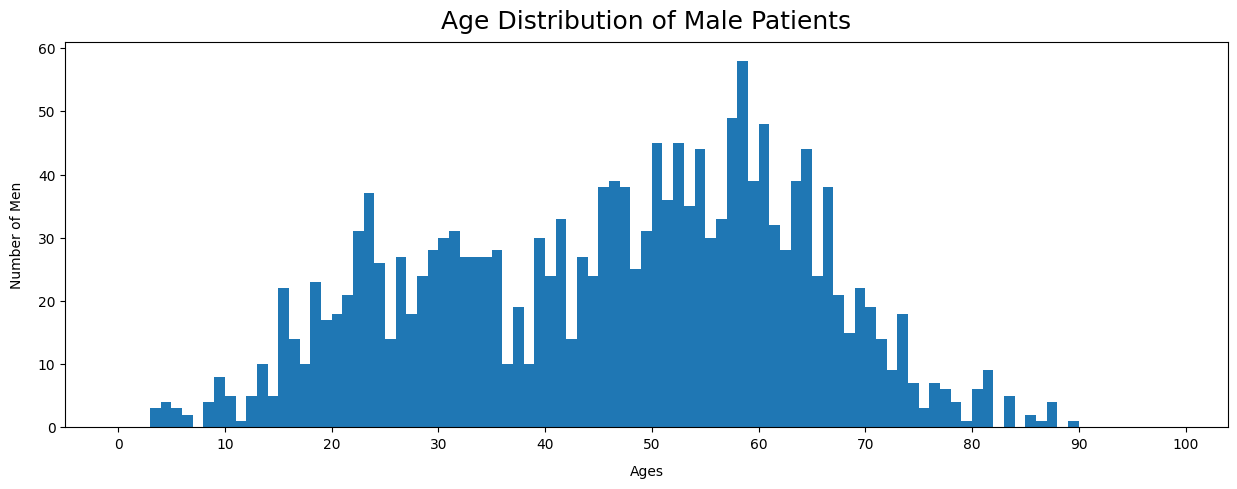


Number of men in each age range:
AgeRange
[0, 10)       24
[10, 20)     112
[20, 30)     244
[30, 40)     239
[40, 50)     293
[50, 60)     414
[60, 70)     311
[70, 80)      88
[80, 90)      28
[90, 100)      0
Name: count, dtype: int64

Age range with the most men: [50, 60) with 414 men.


<ipython-input-37-4aa2bc33b273>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['AgeRange'] = pd.cut(df_men['Age'], bins=age_bins, right=False) # Group ages into bins


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_patients DataFrame is already created

# Filter for male patients
df_men = df_patients[df_patients['Sex'] == 'M']

# Visualize the age distribution of male patients
plt.figure(figsize=(15, 5))
plt.hist(df_men['Age'].dropna(), bins=[i for i in range(100)]) # Use dropna() to handle any potential missing ages
plt.title('Age Distribution of Male Patients', fontsize=18, pad=10)
plt.xlabel('Ages', labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel('Number of Men', labelpad=10)
plt.show()

# To answer the question programmaticallywe can base on the histogram to find the
#  bin with the highest count. We can use Pandas to
#  cut to group ages into bins and then count.
age_bins = range(0, 101, 10) # Define age ranges in 10-year intervals
df_men['AgeRange'] = pd.cut(df_men['Age'], bins=age_bins, right=False) # Group ages into bins

# Count men in each age range
men_by_age_range = df_men['AgeRange'].value_counts().sort_index()

print("\nNumber of men in each age range:")
print(men_by_age_range)

# Find the age range with the most men
most_men_age_range = men_by_age_range.idxmax()
max_men_count = men_by_age_range.max()

print(f"\nAge range with the most men: {most_men_age_range} with {max_men_count} men.")

Accordingly the age range with the most men is 50 to 60.

## Image conversion

In your work, you will need to convert the DICOM format into regular images, for example PNG, and also change the size of the original image

In [45]:
from skimage.transform import resize
import cv2

example = 'stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)

img = imagedata.pixel_array
name = example.split('/')[-1][:-4]
img = resize(img,(512,512))
cv2.imwrite('{}.png'.format(name), img * 255)

True

This option works, but does not take into account the metadata that relates to the image. This mainly concerns `BitsAllocated` and `PhotometricInterpretation`

The `Photometric Interpretation` value specifies the intended interpretation of the image pixel data.

We are interested here in the main two values for x-rays:

     MONOCHROME1 - Pixel data represents one monochrome image plane. The minimum sample value is intended to appear in white after any VOI grayscale transformations are performed.
     MONOCHROME2 - Pixel data represents one monochrome image plane. The minimum sample value is intended to appear in black after any VOI grayscale transformations are performed.

`Bits Allocated` - The number of bits allocated for each pixel sample. Each sample must be allocated the same number of bits. The allocated bits must be either 1 or a multiple of 8.

Let's check the meta tags in our example and try to convert the image.

In [46]:
print(imagedata.BitsAllocated)
print(imagedata.PhotometricInterpretation)

8
MONOCHROME2


##Anonymization of data

When working with patient images, it is often necessary to anonymize files. For example, when transmitting images to doctors for marking.

The easiest way is to use the ready-made function `remove_private_tags`

In [47]:
example = 'stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)
imagedata.remove_private_tags()

In [48]:
#Deleting metatags.
print(imagedata)

if 'PatientSex' in imagedata:
    delattr(imagedata, 'PatientSex')

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9356.1517875217.576696
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: ID_01fe90211
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                          TM: '000000.00'
(0008,0050) Accessio

In [49]:
print(imagedata)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9356.1517875217.576696
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: ID_01fe90211
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                          TM: '000000.00'
(0008,0050) Accessio

In [50]:
# Changing info

tag = 'PatientAge'
if tag in imagedata:
    imagedata.data_element(tag).value = '1111'


In [51]:
print(imagedata)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9356.1517875217.576696
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: ID_01fe90211
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                          TM: '000000.00'
(0008,0050) Accessio

In [52]:
# Save to the new file

output_filename = 'newdicom.dcm'
imagedata.save_as(output_filename)


**Task 1**

Remove the color scheme or try a different one by Xray image.

matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [53]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

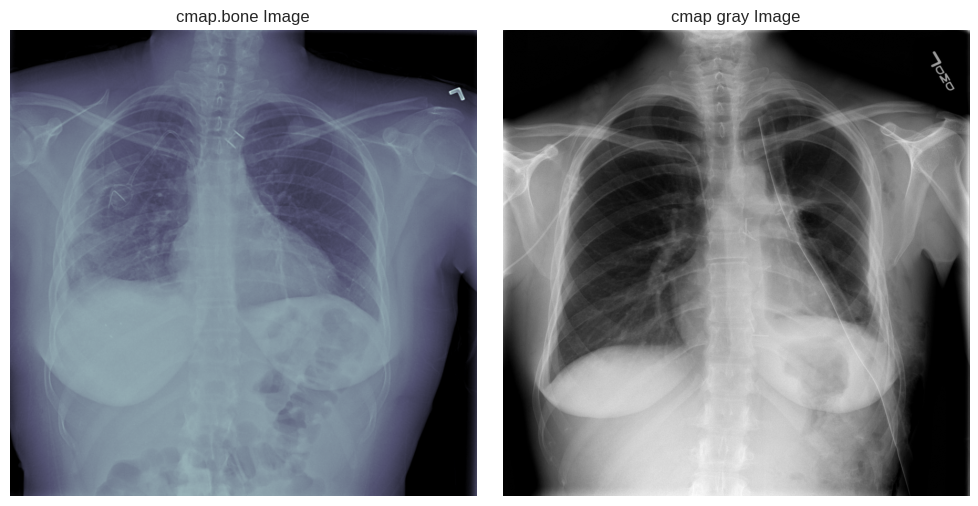

In [62]:
import pydicom
import matplotlib.pyplot as plt
from skimage.transform import resize # Import resize

# Define the side_by_side function correctly
def side_by_side(img1, img2, title1='Image 1', title2='Image 2'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1, cmap=plt.cm.bone)
    ax[0].set_title(title1)
    ax[0].axis('off') # Turn off axis
    ax[1].imshow(img2, cmap='gray') # Display the second image
    ax[1].set_title(title2)
    ax[1].axis('off') # Turn off axis
    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show() # Display the figure

# Load and process the first image
example1 = '/content/stage_2_images/ID_00b115bfe.dcm'
imagedata1 = pydicom.dcmread(example1)
img1 = imagedata1.pixel_array
img1_resized = resize(img1, (512, 512))

example2 = 'stage_2_images/ID_01fe90211.dcm'
imagedata2 = pydicom.dcmread(example2)
img2 = imagedata2.pixel_array

# Use the side_by_side function to compare the two images
side_by_side(img1_resized, img2, title1='cmap.bone Image', title2='cmap gray Image')